In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"]=(15,15)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.SaleType.unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [8]:
train.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [9]:
df=pd.concat((train,test))
tem_df=df

In [10]:
df.shape

(2919, 81)

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Eda

In [12]:
pd.set_option("max_rows",10000)
pd.set_option("max_columns",10000)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [14]:
df=df.set_index("Id")

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


<AxesSubplot:ylabel='Id'>

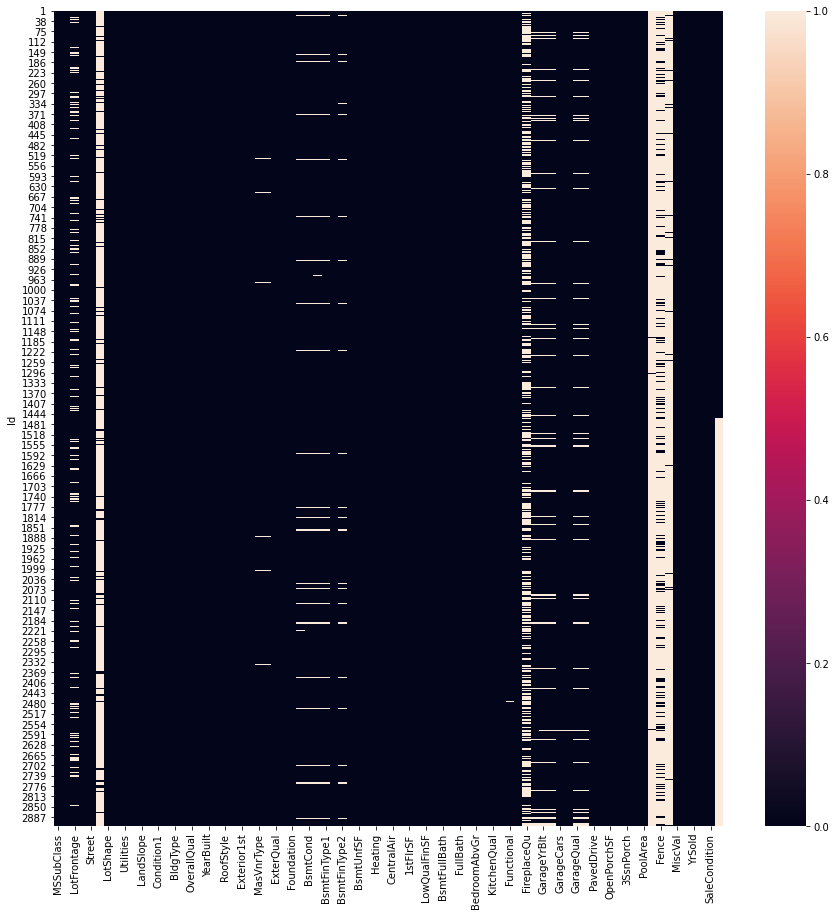

In [16]:
sns.heatmap(df.isnull())

In [17]:
isnull=(df.isnull().sum()/df.shape[0])*100
isnull

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [18]:
col_drop_val=isnull[isnull>20]
col_drop_val

Alley          93.216855
FireplaceQu    48.646797
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
SalePrice      49.982871
dtype: float64

In [19]:
col_drop=isnull[isnull>20].keys()
col_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')

In [20]:
df=df.drop(col_drop,"columns")

In [24]:
df.shape

(2919, 74)

In [25]:
for i in df.columns:
    print(i,"\t",str(len(df[i].unique())))

MSSubClass 	 16
MSZoning 	 6
LotFrontage 	 129
LotArea 	 1951
Street 	 2
LotShape 	 4
LandContour 	 4
Utilities 	 3
LotConfig 	 5
LandSlope 	 3
Neighborhood 	 25
Condition1 	 9
Condition2 	 8
BldgType 	 5
HouseStyle 	 8
OverallQual 	 10
OverallCond 	 9
YearBuilt 	 118
YearRemodAdd 	 61
RoofStyle 	 6
RoofMatl 	 8
Exterior1st 	 16
Exterior2nd 	 17
MasVnrType 	 5
MasVnrArea 	 445
ExterQual 	 4
ExterCond 	 5
Foundation 	 6
BsmtQual 	 5
BsmtCond 	 5
BsmtExposure 	 5
BsmtFinType1 	 7
BsmtFinSF1 	 992
BsmtFinType2 	 7
BsmtFinSF2 	 273
BsmtUnfSF 	 1136
TotalBsmtSF 	 1059
Heating 	 6
HeatingQC 	 5
CentralAir 	 2
Electrical 	 6
1stFlrSF 	 1083
2ndFlrSF 	 635
LowQualFinSF 	 36
GrLivArea 	 1292
BsmtFullBath 	 5
BsmtHalfBath 	 4
FullBath 	 5
HalfBath 	 3
BedroomAbvGr 	 8
KitchenAbvGr 	 4
KitchenQual 	 5
TotRmsAbvGrd 	 14
Functional 	 8
Fireplaces 	 5
GarageType 	 7
GarageYrBlt 	 104
GarageFinish 	 4
GarageCars 	 7
GarageArea 	 604
GarageQual 	 6
GarageCond 	 6
PavedDrive 	 3
WoodDeckSF 	 379
OpenPo

In [26]:
for i in df.columns:
    print(i,"\t",len(df[i].unique()),"\t",df[i].unique())

MSSubClass 	 16 	 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
MSZoning 	 6 	 ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
LotFrontage 	 129 	 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
LotArea 	 1951 	 [ 8450  9600 11250 ...  1894 20000 10441]
Street 	 2 	 ['Pave' 'Grvl']
LotShape 	 4 	 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 	 4 	 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 	 3 	 

In [27]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

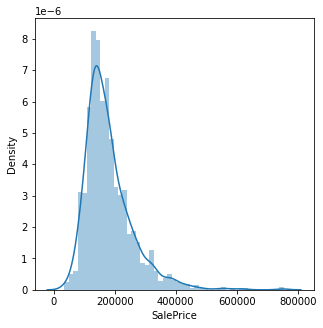

In [28]:
plt.rcParams["figure.figsize"]=(5,5)
sns.distplot(train.SalePrice)

<AxesSubplot:>

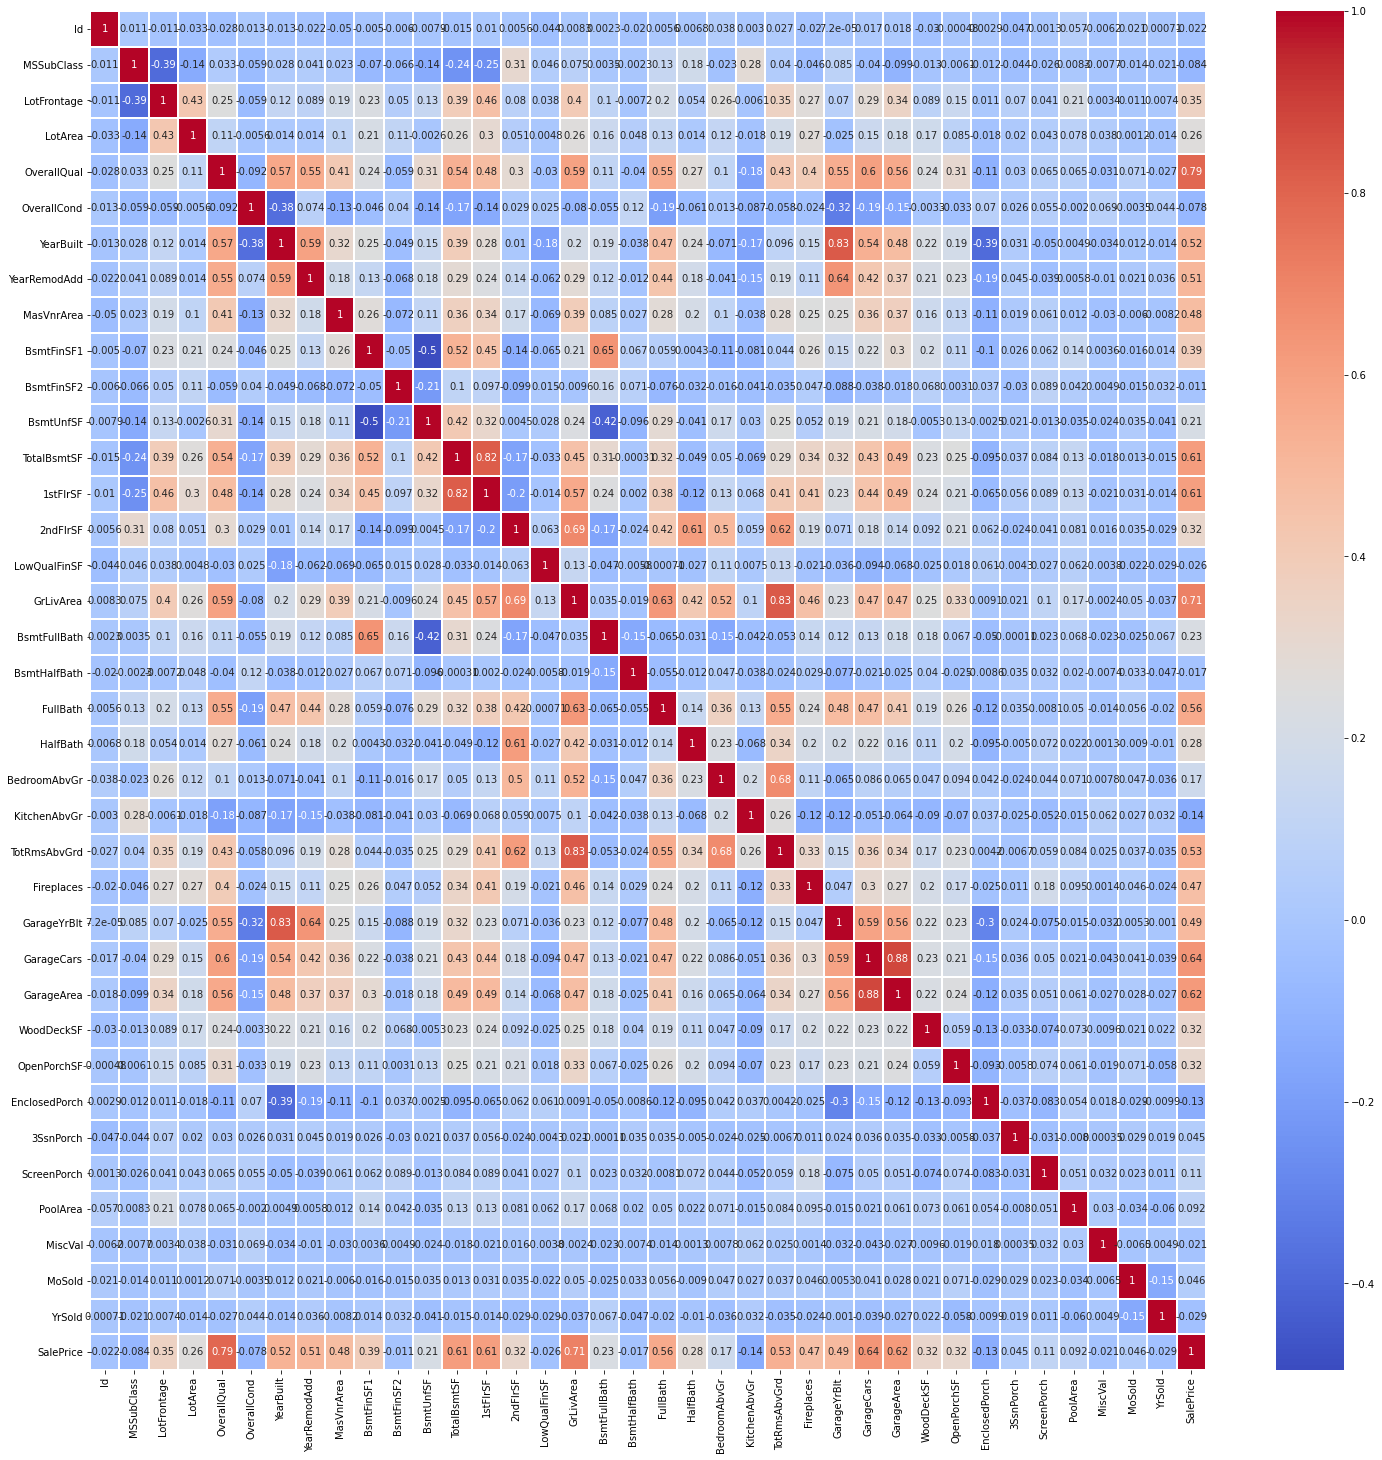

In [29]:
plt.rcParams["figure.figsize"]=(25,25)
sns.heatmap(train.corr(),cmap="coolwarm",annot=True,linewidths=2)

In [30]:
high_corr=train.corr()
high_corr_featue=high_corr.index[abs(high_corr["SalePrice"])>=0.]
high_corr_featue

Index(['OverallQual', 'GrLivArea', 'SalePrice'], dtype='object')

<AxesSubplot:>

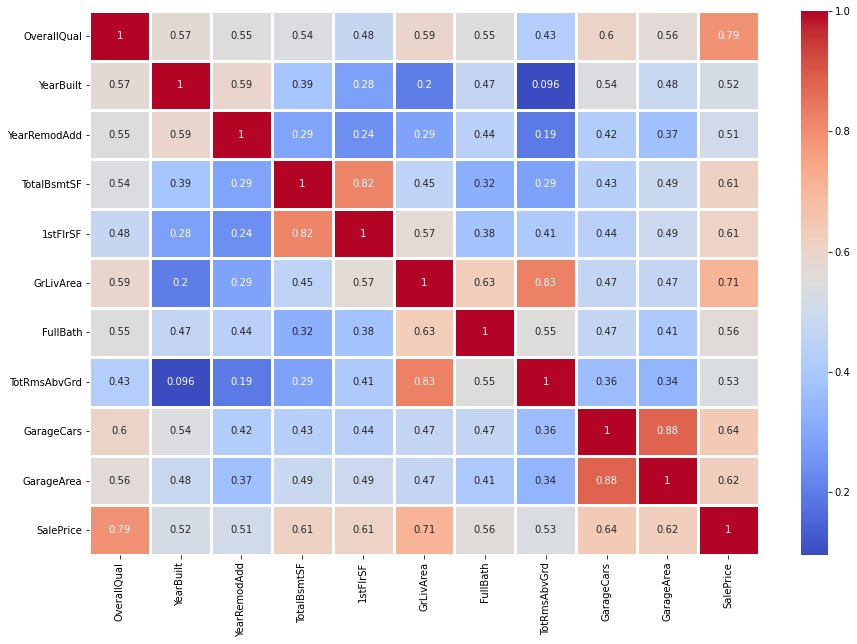

In [27]:
plt.rcParams["figure.figsize"]=(15,10)
sns.heatmap(train[high_corr_featue].corr(),cmap="coolwarm",annot=True,linewidths=3)

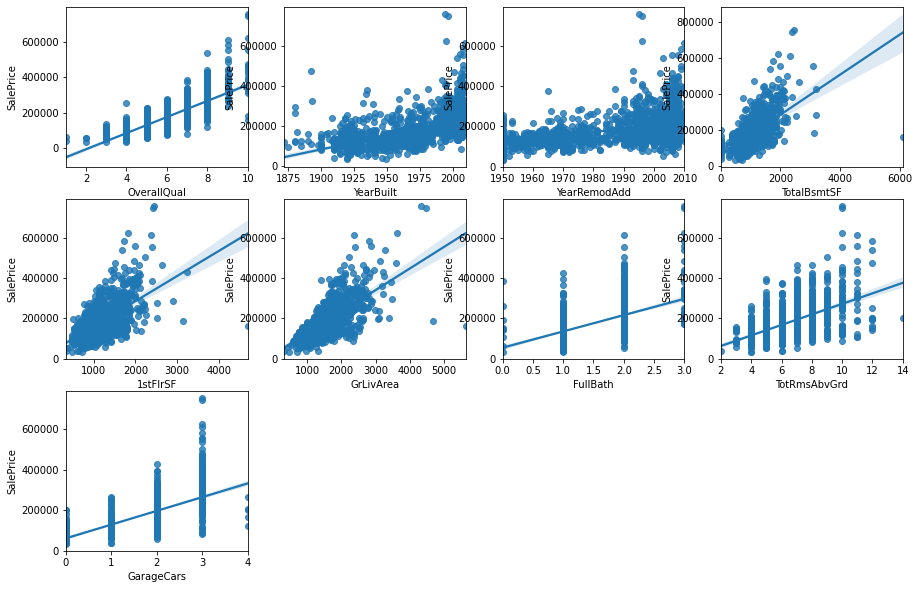

In [28]:
plt.rcParams["figure.figsize"]=(15,10)
for i in range(len(high_corr_featue)):
    if i <9:
        plt.subplot(3,4,i+1)
        sns.regplot(data=train,x=high_corr_featue[i],y="SalePrice")

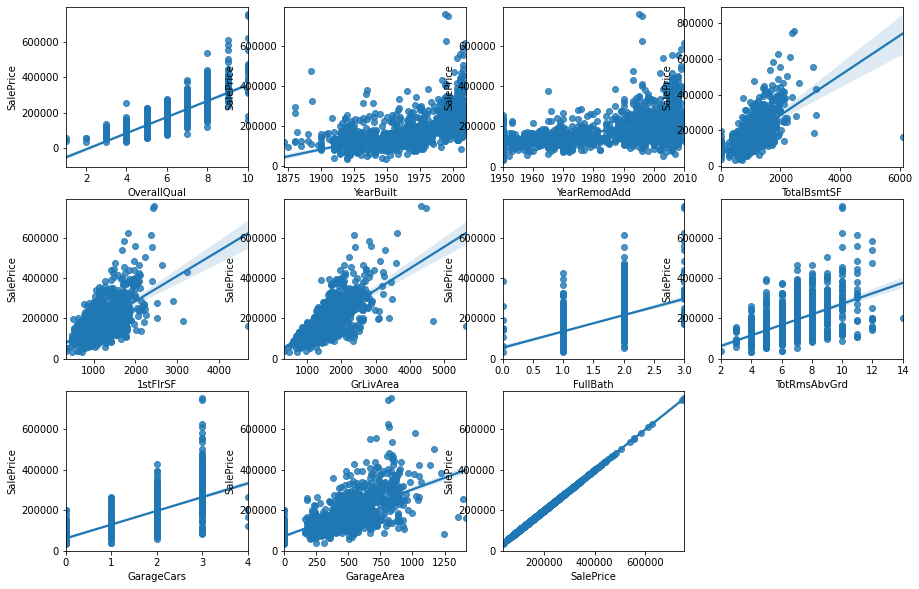

In [42]:
plt.rcParams["figure.figsize"]=(15,10)
for i in range(len(high_corr_featue)):
    plt.subplot(3,4,i+1)
    sns.regplot(data=train,x=high_corr_featue[i],y="SalePrice")

# handing the missing values

In [29]:
y=df.dtypes[df.isnull().any()]
y

MSZoning         object
LotFrontage     float64
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
Electrical       object
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
SaleType         object
dtype: object

In [30]:
key=y.keys()
key

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [31]:
for i in key:
    if df[f"{i}"].dtype=="object":
        df[f"{i}"].fillna(df[f"{i}"].mode()[0],inplace=True)

In [32]:
len(df.dtypes[df.isnull().any()])

11

In [33]:
for i in key:
    if df[f"{i}"].dtype=="float64":
        df[f"{i}"].fillna(df[f"{i}"].mode()[0],inplace=True)

In [34]:
df.isnull().sum().sum()

0

# box plot

In [35]:
x=0
for i in df.columns:
    if df["{}".format(i)].dtype=="float64" or df["{}".format(i)].dtype=="int64":
        x=x+1
print(x)

36


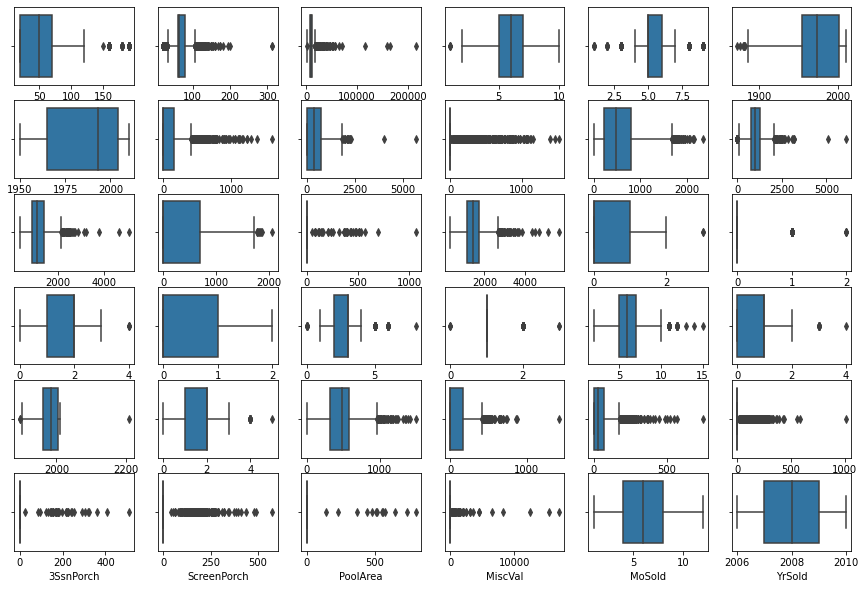

In [36]:
x=0
for i in df.columns:
    if df["{}".format(i)].dtype=="float64" or df["{}".format(i)].dtype=="int64":
        x=x+1
        plt.subplot(6,6,x)
        sns.boxplot(df["{}".format(i)])

In [37]:
yo=["{}".format(i) for i in df.columns if df["{}".format(i)].dtype=="float64" or df["{}".format(i)].dtype=="int64"]
yo

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [38]:
for i in yo:
    iqr=df["{}".format(i)].quantile(0.75)-df["{}".format(i)].quantile(0.25)
    lower_boundary=df["{}".format(i)].quantile(0.25)-(iqr*1.5)
    upper_boundary=df["{}".format(i)].quantile(0.75)+(iqr*1.5)
    if upper_boundary>0:
        df.loc[df[f"{i}"]>=upper_boundary,f"{i}"]=upper_boundary
    elif lower_boundary>0:
        df.loc[df[f"{i}"]<=lower_boundary,f"{i}"]=lower_boundary
    else:
        pass

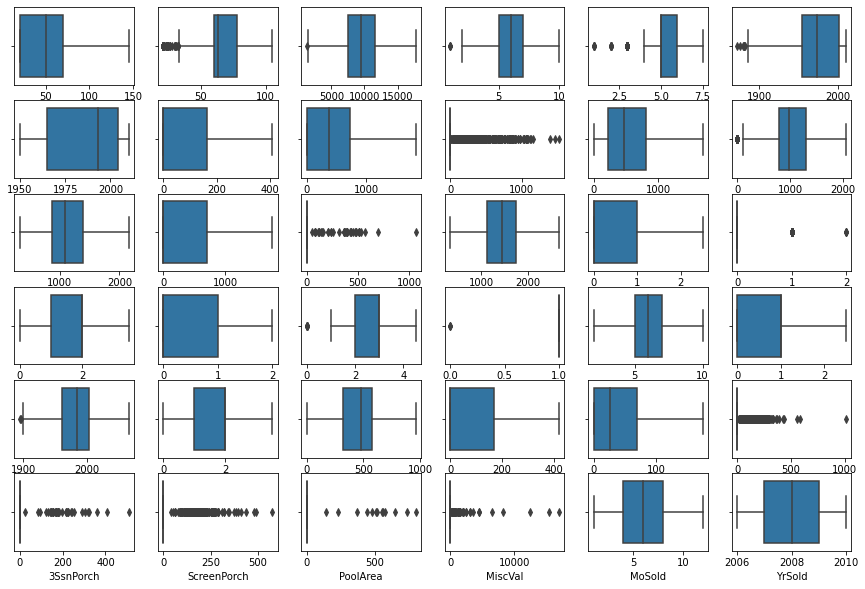

In [39]:
x=0
for i in df.columns:
    if df["{}".format(i)].dtype=="float64" or df["{}".format(i)].dtype=="int64":
        x=x+1
        plt.subplot(6,6,x)
        sns.boxplot(df["{}".format(i)])

# handinling the catagorical data

In [40]:
categorical_variables=[i for i in df.columns if df[i].dtype=="object"]
categorical_variables

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [41]:
less_than_10=[i for i in categorical_variables if len(df[i].unique())<=10]
len(less_than_10)

35

In [42]:
greater_than_10=[i for i in categorical_variables if len(df[i].unique())>10]
print(greater_than_10)

['Neighborhood', 'Exterior1st', 'Exterior2nd']


# encoding

In [43]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

import category_encoders as ce

In [44]:
for i in less_than_10:
    df[i]=lb.fit_transform(df[i])

In [45]:
for i in greater_than_10:
    a=ce.BaseNEncoder(cols=['{}'.format(i)],base=4)
    a = a.fit_transform(df[['{}'.format(i)]])
    df=pd.concat([df,a],axis=1)
    df=df.drop('{}'.format(i),axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      2919 non-null   float64
 1   MSZoning        2919 non-null   int32  
 2   LotFrontage     2919 non-null   float64
 3   LotArea         2919 non-null   float64
 4   Street          2919 non-null   int32  
 5   LotShape        2919 non-null   int32  
 6   LandContour     2919 non-null   int32  
 7   Utilities       2919 non-null   int32  
 8   LotConfig       2919 non-null   int32  
 9   LandSlope       2919 non-null   int32  
 10  Condition1      2919 non-null   int32  
 11  Condition2      2919 non-null   int32  
 12  BldgType        2919 non-null   int32  
 13  HouseStyle      2919 non-null   int32  
 14  OverallQual     2919 non-null   float64
 15  OverallCond     2919 non-null   float64
 16  YearBuilt       2919 non-null   float64
 17  YearRemodAdd    2919 non-null   f

In [47]:
df.shape

(2919, 81)

# scaling

In [48]:
from sklearn.preprocessing import RobustScaler
Scaler= RobustScaler()
Scaler.fit(df)
df=Scaler.transform(df)

# model

In [49]:
train_len=len(train)

In [50]:
X_train=df[:train_len]
X_test=df[train_len:]
y_train=train.SalePrice

In [51]:
print(X_train.shape),print(X_test.shape),print(len(y_train))

(1460, 81)
(1459, 81)
1460


(None, None, None)

# cross val

In [52]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

In [53]:
def test_model(model,X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=3,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [54]:
import sklearn.linear_model as linear_model
lr=linear_model.LinearRegression()
test_model(lr)

[0.8205579422117223]

In [55]:
rid=linear_model.Ridge()
test_model(rid)

[0.8253419539017083]

In [56]:
lasso=linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8205595831532485]

In [57]:
from sklearn.svm import SVR
svr_reg=SVR(kernel="rbf")
test_model(svr_reg)

[-0.05215705045236881]

In [58]:
import xgboost

In [59]:
xgb_reg=xgboost.XGBRegressor(bbooster="gbtree",randome_state=51)
test_model(xgb_reg)

[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster", "randome_state" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster", "randome_state" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster", "randome_state" } might not be used.

  This may not be accura

[0.8300597908711826]

In [60]:
xgb_reg.fit(X_train,y_train)

[18:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster", "randome_state" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, bbooster='gbtree', booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, randome_state=51, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
y_pred=xgb_reg.predict(X_test)
y_pred

array([117811.41, 156642.06, 181471.77, ..., 163007.38, 119833.16,
       215500.1 ], dtype=float32)

In [62]:
submit_test1=pd.concat([test["Id"],pd.DataFrame(y_pred)],axis=1)
submit_test1.columns=["Id","SalePrice"]

In [63]:
submit_test1

,Id,SalePrice
0,1461,117811.406250
1,1462,156642.062500
2,1463,181471.765625
3,1464,185825.000000
4,1465,200941.281250
5,1466,173648.156250
6,1467,173863.031250
7,1468,174244.937500
8,1469,190476.734375
9,1470,123656.750000


In [64]:
submit_test1.to_csv("sample_submission.csv",index=False)